“Modelo de lenguaje utilizando RoBERTuito, para identificar tweets con contenido de violencia política de género hacia las asambleístas electas en Ecuador para el periodo 2021-2025”

Instalación de dependencias

In [ ]:
!pip install datasets transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 94.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 16.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
!pip install pysentimiento

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=72e202fb2904d844a53f79ec5fa2d861bb9d88dfd599780edf525c1f54b0dbef
  Stored in directory: /root/.cache/pip/wheels/5e/8c/80/c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji


Inicio sesión

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
    
Token: 
Add token as git credential? (Y/n) y
Token is valid.
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper

In [ ]:
!git config --global user.email "edmundo.j.pezantes@unl.edu.ec"
!git config --global user.name "JPezantes"

In [ ]:
!apt install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.3.4-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


Conexión a Google Drive

In [ ]:
#import transformers
import pandas as pd
#print(transformers.__version__)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Visualización de Datos

In [ ]:
datos=pd.read_csv('/content/drive/MyDrive/ViolenciaPoíticaDeGénero/Datos_Balanceados_Undersampling.csv')
datos.dropna(inplace = True)
datos

,id,text,task
0,8126,fueron primeros en todo incluso barriendo en l...,no violencia política de género
1,19491,te recuerdo el modelo de gobierno ruso es bast...,no violencia política de género
2,14493,la gestión de la se reduce esto resoluciones s...,no violencia política de género
3,9614,porque no hay quien hablar va perder el tiempo,no violencia política de género
4,15654,están desesperados buscando la forma de volver...,no violencia política de género
...,...,...,...
7215,19644,hasta la gorra debe ser robada,violencia política de género
7216,19645,usted unase dejar la corrupción robo saqueo de...,violencia política de género
7217,19646,envidiosita,violencia política de género
7218,19649,calla calla muerta de hambre recuerda quien fu...,violencia política de género


In [ ]:
print("numero de tweets pertenecen a las classes violencia política de género and no violencia política de género")
datos.groupby('task')['id'].nunique()

numero de tweets pertenecen a las classes violencia política de género and no violencia política de género


task
no violencia política de género    3610
violencia política de género       3610
Name: id, dtype: int64

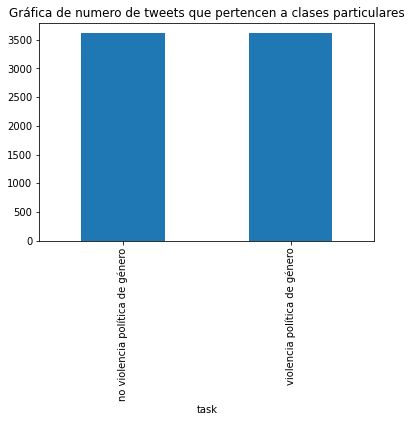

In [ ]:
datos.groupby('task')['id'].nunique().plot(kind='bar',title='Gráfica de numero de tweets que pertencen a clases particulares')

In [ ]:
df = pd.DataFrame(datos)

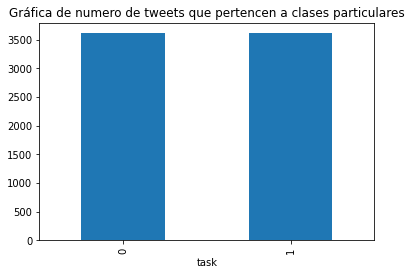

In [ ]:
df['task'] = df.groupby('task')['task'].transform(lambda x: x.replace('no violencia política de género', 0))
df['task'] = df.groupby('task')['task'].transform(lambda x: x.replace('violencia política de género', 1))
datos.groupby('task')['id'].count().plot(kind='bar',title='Gráfica de numero de tweets que pertencen a clases particulares')

In [ ]:
model_checkpoint = "pysentimiento/robertuito-base-cased"

Carga y visualización de dataset

In [ ]:
from datasets import load_dataset, list_datasets, load_metric,DatasetDict

In [ ]:
dataset=load_dataset('csv',data_files='/content/drive/MyDrive/ViolenciaPoíticaDeGénero/Datos_Balanceados_Undersampling.csv')

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-1b4ca06e05d7231f/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

División de dataset

In [ ]:
train_devtest = dataset['train'].train_test_split(shuffle = True, seed = 200, test_size=0.1)
posts_dev_test = train_devtest['test'].train_test_split(shuffle = True, seed = 200, test_size=0.50)
dataset = DatasetDict({
    'train': train_devtest['train'],
    'validation': posts_dev_test['test'],
    'test': posts_dev_test['train']})

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'task'],
        num_rows: 6498
    })
    validation: Dataset({
        features: ['id', 'text', 'task'],
        num_rows: 361
    })
    test: Dataset({
        features: ['id', 'text', 'task'],
        num_rows: 361
    })
})

Ejemplificación

In [ ]:
dataset['train'][5]

{'id': 4231,
 'text': 'pero hay que hacerle caso este es muy inteligente no tiene dedos de frente de echo la frente le llega al culo',
 'task': 'no violencia política de género'}

In [ ]:
dataset['validation'][5]

{'id': 2880,
 'text': 'bossman con de burro sus burradas',
 'task': 'no violencia política de género'}

In [ ]:
dataset['test'][5]

{'id': 10106,
 'text': 'para que ir perder el tiempo en ese circo con tanto payaso de pésima calidad',
 'task': 'no violencia política de género'}

Conversión con Pandas

In [ ]:
dataset.set_format('pandas')
df = dataset['train'][:]

In [ ]:
df.to_csv('/content/drive/MyDrive/ViolenciaPoíticaDeGénero/train.csv',index=False)

In [ ]:
dataset.set_format('pandas')
df = dataset['test'][:]

In [ ]:
df.to_csv('/content/drive/MyDrive/ViolenciaPoíticaDeGénero/test.csv',index=False)

In [ ]:
dataset.set_format('pandas')
df = dataset['validation'][:]

In [ ]:
df.to_csv('/content/drive/MyDrive/ViolenciaPoíticaDeGénero/validation.csv',index=False)

In [ ]:
df['task'].value_counts()

violencia política de género       3250
no violencia política de género    3248
Name: task, dtype: int64

In [ ]:
dataset.reset_format()

In [ ]:
dataset.unique('task')

Flattening the indices:   0%|          | 0/7 [00:00<?, ?ba/s]

Flattening the indices:   0%|          | 0/1 [00:00<?, ?ba/s]

Flattening the indices:   0%|          | 0/1 [00:00<?, ?ba/s]

{'train': ['violencia política de género', 'no violencia política de género'],
 'validation': ['violencia política de género',
  'no violencia política de género'],
 'test': ['no violencia política de género', 'violencia política de género']}

In [ ]:
num_labels = len(dataset['train'].unique('task'))

In [ ]:
num_labels

2

In [ ]:
from pysentimiento.preprocessing import preprocess_tweet
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained('pysentimiento/robertuito-base-cased')

model = AutoModelForSequenceClassification.from_pretrained("pysentimiento/robertuito-base-cased", num_labels=num_labels)

Downloading:   0%|          | 0.00/319 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/828k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/677 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/435M [00:00<?, ?B/s]

Some weights of the model checkpoint at pysentimiento/robertuito-base-cased were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pysentimiento/robertuito-base-cased and are newly initialized: ['classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.w

Selección d métrica

In [ ]:
metric = load_metric("accuracy")

<ipython-input-26-21f3ecd7ee32>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [ ]:
metric

Metric(name: "accuracy", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = datasets.load_metric("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
        >>> print(results)
        {'accuracy': 0.5}

   

In [ ]:
import numpy as np
fake_preds=np.random.randint(0,2,size=(64,))
fake_labels=np.random.randint(0,2,size=(64,))

metric.compute(predictions=fake_preds,references=fake_labels)

{'accuracy': 0.5}

Cambio de str a int

In [ ]:
def set_label(examples):
  if examples["task"] == "no violencia política de género":
    label=0
  else:
    label=1
  return {"labels": label}
  #no violencia política de género=0
  #violencia política de género=1

In [ ]:
dataset=dataset.map(set_label)

  0%|          | 0/6498 [00:00<?, ?ex/s]

  0%|          | 0/361 [00:00<?, ?ex/s]

  0%|          | 0/361 [00:00<?, ?ex/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'task', 'labels'],
        num_rows: 6498
    })
    validation: Dataset({
        features: ['id', 'text', 'task', 'labels'],
        num_rows: 361
    })
    test: Dataset({
        features: ['id', 'text', 'task', 'labels'],
        num_rows: 361
    })
})

In [ ]:
def encode(examples):
  return tokenizer(examples['text'],padding=True,truncation=True)

In [ ]:
dataset=dataset.map(encode,batched=True,remove_columns=['id',	'text',	'task'])

  0%|          | 0/7 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 6498
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 361
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 361
    })
})

In [ ]:
dataset['train'][2]

{'labels': 1,
 'input_ids': [0,
  696,
  3735,
  842,
  442,
  7667,
  4490,
  27185,
  550,
  466,
  1727,
  6980,
  531,
  6064,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

**FineTuning del Modelo**

In [ ]:
from transformers import TrainingArguments, Trainer

In [ ]:
metric_name = 'accuracy'
model_name ='pysentimiento/robertuito-base-cased-finetuning-vpg-undersampling'

args = TrainingArguments(
    model_name,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_eval_batch_size=8,
    per_device_train_batch_size=8,
    num_train_epochs=20,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    push_to_hub=True,
)

In [ ]:
def compute_metrics(eval_pred):
  predictions,labels=eval_pred
  predictions=np.argmax(predictions, axis=1)
  return metric.compute(predictions=predictions, references=labels)

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=dataset['train'],
    eval_dataset=dataset['validation'],
    tokenizer = tokenizer,
    compute_metrics=compute_metrics
)

/usr/local/lib/python3.8/dist-packages/huggingface_hub/repository.py:725: FutureWarning: Creating a repository through 'clone_from' is deprecated and will be removed in v0.12. Please create the repository first using `create_repo(..., exists_ok=True)`.
  warnings.warn(
Cloning https://huggingface.co/JosePezantes/robertuito-base-cased-finetuning-vpg-undersampling into local empty directory.


Entrenamiento

In [ ]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 361
  Batch size = 8
You're using a PreTrainedTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'eval_loss': 0.7029246687889099,
 'eval_accuracy': 0.5124653739612188,
 'eval_runtime': 4.3503,
 'eval_samples_per_second': 82.982,
 'eval_steps_per_second': 10.574}

In [ ]:
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 6498
  Num Epochs = 20
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 16260
  Number of trainable parameters = 108788738


Epoch,Training Loss,Validation Loss,Accuracy
1,0.442400,0.400085,0.855956
2,0.295700,0.518189,0.864266
3,0.203300,0.689183,0.844875
4,0.109400,0.782177,0.844875
5,0.059900,0.948181,0.853186
6,0.040900,1.161896,0.855956
7,0.020200,1.256747,0.836565
8,0.013400,1.391080,0.844875
9,0.013800,1.377751,0.839335
10,0.023000,1.499012,0.855956


***** Running Evaluation *****
  Num examples = 361
  Batch size = 8


Saving model checkpoint to pysentimiento/robertuito-base-cased-finetuning-vpg-undersampling/checkpoint-813
Configuration saved in pysentimiento/robertuito-base-cased-finetuning-vpg-undersampling/checkpoint-813/config.json
Model weights saved in pysentimiento/robertuito-base-cased-finetuning-vpg-undersampling/checkpoint-813/pytorch_model.bin
tokenizer config file saved in pysentimiento/robertuito-base-cased-finetuning-vpg-undersampling/checkpoint-813/tokenizer_config.json
Special tokens file saved in pysentimiento/robertuito-base-cased-finetuning-vpg-undersampling/checkpoint-813/special_tokens_map.json
tokenizer config file saved in pysentimiento/robertuito-base-cased-finetuning-vpg-undersampling/tokenizer_config.json
Special tokens file saved in pysentimiento/robertuito-base-cased-finetuning-vpg-undersampling/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 361
  Batch size = 8
Saving model checkpoint to pysentimiento/robertuito-base-cased-finetuning-vpg-undersam

TrainOutput(global_step=16260, training_loss=0.06425461564359093, metrics={'train_runtime': 2406.7774, 'train_samples_per_second': 53.998, 'train_steps_per_second': 6.756, 'total_flos': 4765723351292760.0, 'train_loss': 0.06425461564359093, 'epoch': 20.0})

In [ ]:
trainer.evaluate(eval_dataset=dataset['test'])

***** Running Evaluation *****
  Num examples = 361
  Batch size = 8


{'eval_loss': 0.6191439032554626,
 'eval_accuracy': 0.8365650969529086,
 'eval_runtime': 1.4343,
 'eval_samples_per_second': 251.694,
 'eval_steps_per_second': 32.072,
 'epoch': 20.0}

In [ ]:
trainer.push_to_hub()

Saving model checkpoint to pysentimiento/robertuito-base-cased-finetuning-vpg-undersampling
Configuration saved in pysentimiento/robertuito-base-cased-finetuning-vpg-undersampling/config.json
Model weights saved in pysentimiento/robertuito-base-cased-finetuning-vpg-undersampling/pytorch_model.bin
tokenizer config file saved in pysentimiento/robertuito-base-cased-finetuning-vpg-undersampling/tokenizer_config.json
Special tokens file saved in pysentimiento/robertuito-base-cased-finetuning-vpg-undersampling/special_tokens_map.json
Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file pytorch_model.bin:   0%|          | 3.30k/415M [00:00<?, ?B/s]

Upload file runs/Dec12_16-48-47_525c6a840581/events.out.tfevents.1670866176.525c6a840581.75.2: 100%|##########…

Upload file runs/Dec12_16-48-47_525c6a840581/events.out.tfevents.1670863760.525c6a840581.75.0:  21%|##        …

remote: Scanning LFS files for validity, may be slow...        
remote: LFS file scan complete.        
To https://huggingface.co/JosePezantes/robertuito-base-cased-finetuning-vpg-undersampling
   1f04e34..6716919  main -> main

remote: LFS file scan complete.        
To https://huggingface.co/JosePezantes/robertuito-base-cased-finetuning-vpg-undersampling
   1f04e34..6716919  main -> main

Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Text Classification', 'type': 'text-classification'}, 'metrics': [{'name': 'Accuracy', 'type': 'accuracy', 'value': 0.8365650969529086}]}
To https://huggingface.co/JosePezantes/robertuito-base-cased-finetuning-vpg-undersampling
   6716919..ebc0ec0  main -> main

   6716919..ebc0ec0  main -> main



'https://huggingface.co/JosePezantes/robertuito-base-cased-finetuning-vpg-undersampling/commit/67169191741afe4127271eb91ddaa69dc3aff6dd'

In [ ]:
from transformers import AutoModelForSequenceClassification

model_name = "JosePezantes/robertuito-base-cased-finetuning-vpg-undersampling"
model = AutoModelForSequenceClassification.from_pretrained(model_name)

Downloading:   0%|          | 0.00/793 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/435M [00:00<?, ?B/s]

In [ ]:
from transformers import pipeline

classifier = pipeline("text-classification", model=model_name)

Downloading:   0%|          | 0.00/408 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.28M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [ ]:
#no violencia politica de genero=0
#violencia politica de genero=1
classifier("tonta", return_all_scores=True)

/usr/local/lib/python3.8/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'LABEL_0', 'score': 0.0040911342948675156},
  {'label': 'LABEL_1', 'score': 0.9959088563919067}]]

In [ ]:
model.config.label2id = {"no violencia política de género": 0, "violencia política de género": 1}

In [ ]:
model.config.id2label = {0: "no violencia política de género", 1: "violencia política de género"}

In [ ]:
model.config.push_to_hub("JosePezantes/robertuito-base-cased-finetuning-vpg-undersampling")

CommitInfo(commit_url='https://huggingface.co/JosePezantes/robertuito-base-cased-finetuning-vpg-undersampling/commit/37718383ddf2d5e2c7d9f9ec066ad83e8ad5dbe2', commit_message='Upload config', commit_description='', oid='37718383ddf2d5e2c7d9f9ec066ad83e8ad5dbe2', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
classifier = pipeline("text-classification", model=model_name)

classifier("Mi nombre es Jose")

[{'label': 'no violencia política de género', 'score': 0.9980764389038086}]

In [ ]:
classifier("tonta")

[{'label': 'violencia política de género', 'score': 0.9959088563919067}]